In [119]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import matplotlib.pyplot as plt


# Data preprecessing

In [120]:
# Load the dataset
file_path = 'AirQualityUCI _ Students.xlsx'
df = pd.read_excel(file_path)

# Handle missing values
df.replace(-200, np.nan, inplace=True)  # Tensorflow can not handle pd.NA
df.dropna(inplace=True)  # 8358 -> 754  ???????????????????????????
df.reset_index(drop=True, inplace=True)
print(df)

# Show the dataset


          Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0   2004-03-10  18:00:00     2.6      1360.00     150.0  11.881723   
1   2004-03-10  19:00:00     2.0      1292.25     112.0   9.397165   
2   2004-03-10  20:00:00     2.2      1402.00      88.0   8.997817   
3   2004-03-10  21:00:00     2.2      1375.50      80.0   9.228796   
4   2004-03-10  22:00:00     1.6      1272.25      51.0   6.518224   
..         ...       ...     ...          ...       ...        ...   
749 2004-04-30  20:00:00     4.4      1449.25     501.0  19.494597   
750 2004-04-30  21:00:00     3.1      1362.50     234.0  15.100351   
751 2004-04-30  22:00:00     3.0      1371.25     212.0  14.594739   
752 2004-04-30  23:00:00     3.1      1406.25     275.0  13.697100   
753 2004-05-01  00:00:00     3.5      1424.50     275.0  15.187992   

     PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0          1045.50    166.0       1056.25    113.0       1692.00      1267.50 

In [121]:
# There is a 'Date' and 'Time' column:
if 'Date' in df.columns:
    print(df['Date'], end='\n\n')
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].apply(lambda x: x.timestamp())
	# df['Date'] = df['Date'].apply(lambda x: x.)


if 'Time' in df.columns:
	# If 'Time' column is present and needs to be removed:
	df = df.drop(columns=['Time'])
print(df.dtypes)

0     2004-03-10
1     2004-03-10
2     2004-03-10
3     2004-03-10
4     2004-03-10
         ...    
749   2004-04-30
750   2004-04-30
751   2004-04-30
752   2004-04-30
753   2004-05-01
Name: Date, Length: 754, dtype: datetime64[ns]

Date             float64
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object


# Task 1

In [122]:

# Separate the input features and the target variable
features = df.drop(columns=['CO(GT)'])  # <class 'pandas.core.frame.DataFrame'>
target = df['CO(GT)']
print(features.index, target.shape)
# Normalize the input features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)  # DataFrame -> ndarray
print(features_scaled.shape)
# Create labels based on CO(GT) threshold
threshold = target.mean()
labels = (target > threshold).astype(int)
print(labels, type(labels), sep='\n')

RangeIndex(start=0, stop=754, step=1) (754,)
(754, 13)
0      1
1      0
2      0
3      0
4      0
      ..
749    1
750    1
751    1
752    1
753    1
Name: CO(GT), Length: 754, dtype: int32
<class 'pandas.core.series.Series'>


In [123]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

Epoch 1/50
16/16 [==============================] - 0s 6ms/step - loss: 0.8424 - accuracy: 0.4751 - val_loss: 0.5552 - val_accuracy: 0.8017
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.6888 - val_loss: 0.4061 - val_accuracy: 0.9256
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8237 - val_loss: 0.3263 - val_accuracy: 0.9339
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8817 - val_loss: 0.2683 - val_accuracy: 0.9339
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.8921 - val_loss: 0.2248 - val_accuracy: 0.9339
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.9129 - val_loss: 0.1915 - val_accuracy: 0.9421
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9315 - val_loss: 0.1678 - val_accuracy: 0.9421
Epoch 8/50
16/16 [==

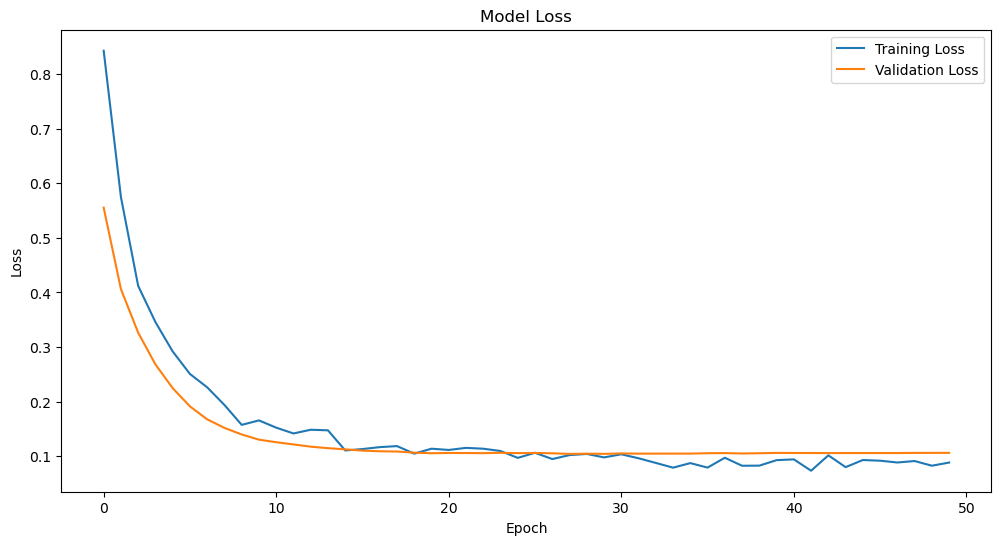

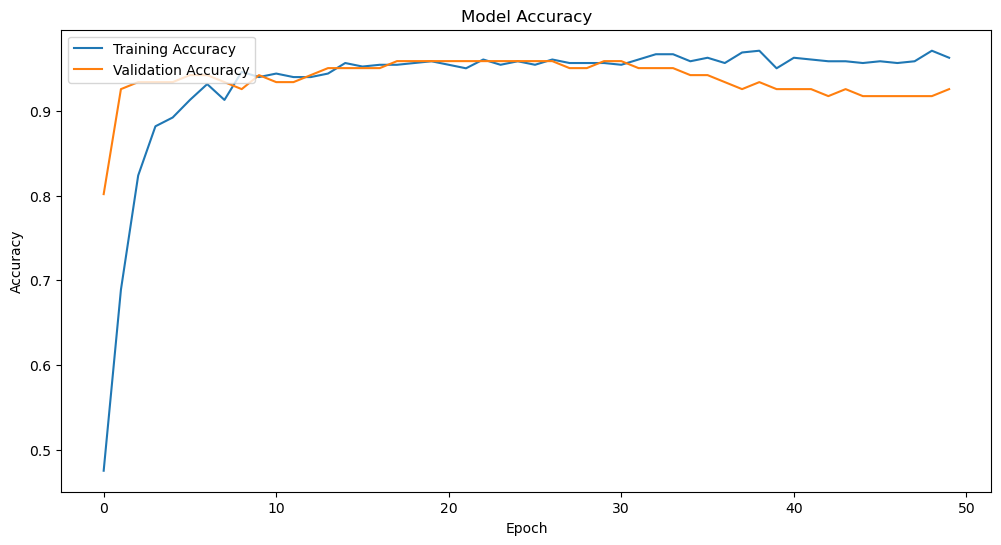

Confusion Matrix:
[[81  0]
 [ 4 66]]
Accuracy: 97.35%
Precision: 100.00%


In [124]:
# Convert target variables to NumPy arrays
y_train = y_train.values
y_test = y_test.values

# Design the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Confusion Matrix, Accuracy, and Precision
conf_matrix = confusion_matrix(y_test, y_pred) # type: ignore
accuracy = accuracy_score(y_test, y_pred) # type: ignore
precision = precision_score(y_test, y_pred) # type: ignore

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")

# Task 2

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
Epoch 1/50
16/16 [==============================] - 1s 7ms/step - loss: 24291.2734 - mae: 135.0832 - val_loss: 23401.0137 - val_mae: 135.7419
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 23913.5527 - mae: 133.9671 - val_loss: 23023.7773 - val_mae: 134.5650
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 23509.9727 - mae: 132.6714 - val_loss: 22464.9121 - val_mae: 132.8276
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 22794.3906 - mae: 130.5296 - val_loss: 21643.6621 - val_mae: 130.2455
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 21681.7461 - mae: 127.2709 - val_loss: 20461.9727 - val_mae: 126.5090
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 20148.3887 - mae: 122.6051 - val_loss: 18883.6758 - val_mae: 121.3476
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 18400.1211 - mae: 116.7435 -

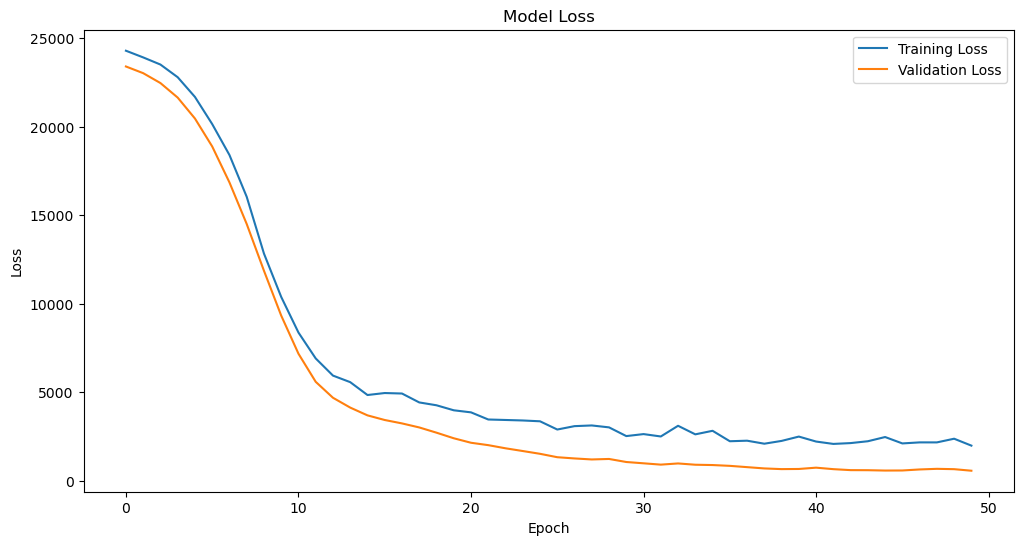

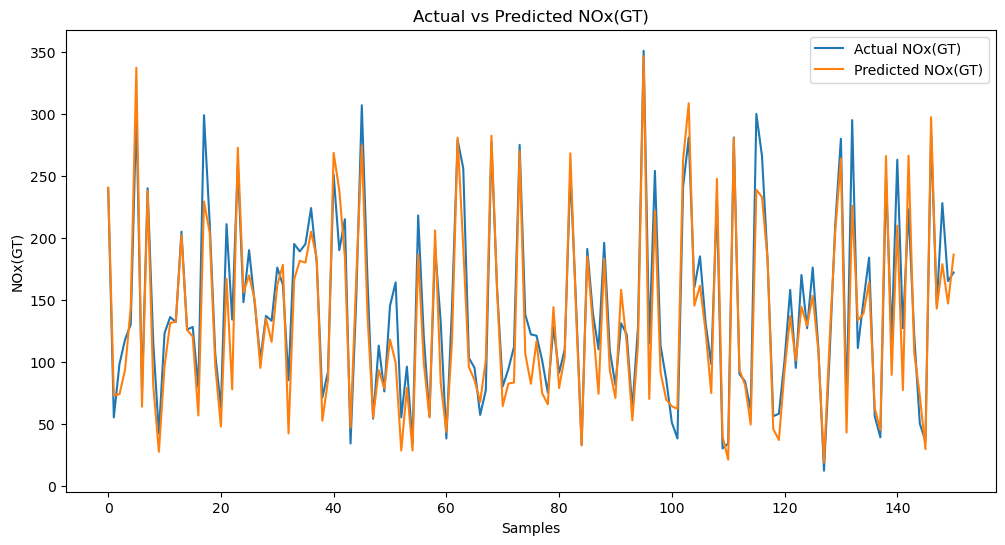

Root Mean Squared Error (RMSE): 23.8176687122991
Mean Absolute Error (MAE): 18.328974704868745


In [125]:
# Separate the input features and the target variable
features = df.drop(columns=['NOx(GT)'])
target = df['NOx(GT)']

# Normalize the input features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Convert target variables to NumPy arrays
y_train = y_train.values
y_test = y_test.values

# Design the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
print(type(X_train), type(y_train))
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plot predicted vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual NOx(GT)')
plt.plot(y_pred, label='Predicted NOx(GT)')
plt.title('Actual vs Predicted NOx(GT)')
plt.xlabel('Samples')
plt.ylabel('NOx(GT)')
plt.legend(loc='upper right')
plt.show()

# Compute performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")